In [39]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
url ="https://www.google.co.in/flights/explore/#explore;f=JFK,EWR,LGA;t=r-Europe-0x46ed8886cfadda85%253A0x72ef99e6b3fcf079;li=8;lx=12;d=2016-11-29"
driver = webdriver.PhantomJS()
dcap = dict(DesiredCapabilities.PHANTOMJS)
dcap["phantomjs.page.settings.userAgent"] = ("Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.99 Safari/537.36")
driver = webdriver.PhantomJS(desired_capabilities=dcap,service_args=['--ignore-ssl-errors=true'])
driver.implicitly_wait(20)
driver.get(url)

In [41]:
s = BeautifulSoup(driver.page_source, "lxml")


In [42]:
best_price_tags = s.findAll('div', 'LH3SCIC-w-e')
best_prices = []
for tag in best_price_tags:
    best_prices.append(int(tag.text.replace('$','').replace(',','')))

In [43]:
best_price_tags

[<div class="LH3SCIC-w-e" style="top: 78.14087364990094px;">$329</div>,
 <div class="LH3SCIC-w-e" style="top: 77.08287611021856px;">$360</div>,
 <div class="LH3SCIC-w-e" style="top: 77.46348978431901px;">$360</div>,
 <div class="LH3SCIC-w-e" style="top: 59.88136456211812px;">$376</div>,
 <div class="LH3SCIC-w-e" style="top: 55.61793294981155px;">$384</div>,
 <div class="LH3SCIC-w-e" style="top: 79.41251397228937px;">$386</div>,
 <div class="LH3SCIC-w-e" style="top: 80.9937422986784px;">$391</div>,
 <div class="LH3SCIC-w-e" style="top: 75.42941633809075px;">$416</div>,
 <div class="LH3SCIC-w-e" style="top: 75.99935225294523px;">$420</div>,
 <div class="LH3SCIC-w-e" style="top: 67.04769090508975px;">$468</div>]

In [44]:
best_price = best_prices[0]
best_price

329

In [45]:
best_height_tags = s.findAll('div', 'LH3SCIC-w-f')
best_heights = []
for t in best_height_tags:
    best_heights.append(float(t.attrs['style']\
          .split('height:')[1].replace('px;','')))

best_height = best_heights[0]
best_height

27.85912635009906

In [46]:
pph = np.array(best_price)/np.array(best_height)
pph

11.809415552574574

In [47]:
cities = s.findAll('div', 'LH3SCIC-w-o')
cities

[<div class="LH3SCIC-w-o LH3SCIC-w-b"><div class="LH3SCIC-w-x" style="left: 0px; height: 35.07985556336678px;"></div><div class="LH3SCIC-w-x" style="left: 6px; height: 34.02134594490957px;"></div><div class="LH3SCIC-w-x" style="left: 12px; height: 34.02134594490957px;"></div><div class="LH3SCIC-w-x" style="left: 18px; height: 34.02134594490957px;"></div><div class="LH3SCIC-w-x LH3SCIC-w-M" style="left: 24px; height: 34.02134594490957px;"></div><div class="LH3SCIC-w-x LH3SCIC-w-M" style="left: 30px; height: 34.02134594490957px;"></div><div class="LH3SCIC-w-x" style="left: 36px; height: 34.02134594490957px;"></div><div class="LH3SCIC-w-x" style="left: 42px; height: 35.99440787371381px;"></div><div class="LH3SCIC-w-x" style="left: 48px; height: 34.02134594490957px;"></div><div class="LH3SCIC-w-x" style="left: 54px; height: 41.49188342813319px;"></div><div class="LH3SCIC-w-x" style="left: 60px; height: 38.41627788074391px;"></div><div class="LH3SCIC-w-x LH3SCIC-w-M" style="left: 66px; heig

In [48]:
hlist=[]
for bar in cities[0]\
        .findAll('div', 'LH3SCIC-w-x'):
        hlist.append(float(bar['style']\
            .split('height: ')[1].replace('px;',''))*pph)

In [49]:
fares = pd.DataFrame(hlist, columns=['price'])
fares

,price
0,414.272592
1,401.772212
2,401.772212
3,401.772212
4,401.772212
5,401.772212
6,401.772212
7,425.072920
8,401.772212
9,489.994893


In [50]:
fares.min()

price    329.0
dtype: float64

In [51]:
fares.median()

price    432.473145
dtype: float64

In [52]:
fares.describe()

,price
count,60.000000
mean,549.467534
std,205.768208
min,329.000000
25%,401.772212
50%,432.473145
75%,660.385072
max,1251.798049


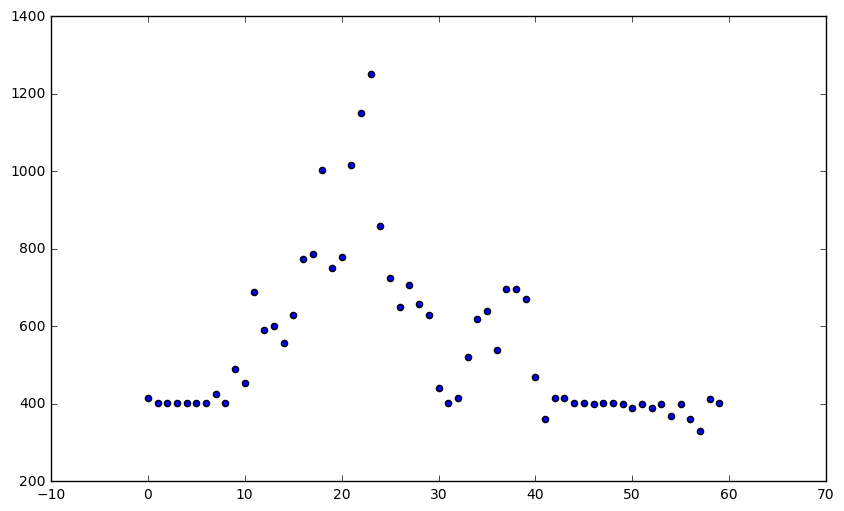

In [53]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(np.arange(len(fares['price'])),fares['price'])

In [54]:
px = [x for x in fares['price']]
ff = pd.DataFrame(px, columns=['fare']).reset_index()

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [56]:
X = StandardScaler().fit_transform(ff)
db = DBSCAN(eps=.5, min_samples=1).fit(X)


C:\Users\sandhyao\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:


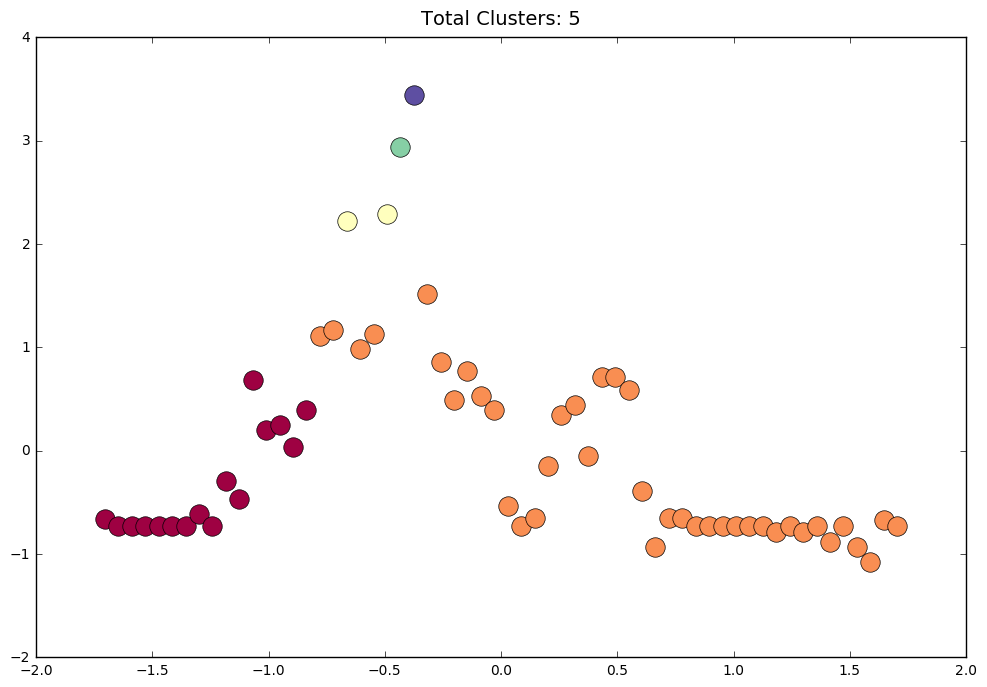

In [58]:
labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.subplots(figsize=(12,8))
for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=c,
        markeredgecolor='k', markersize=14)
plt.title("Total Clusters: {}".format(clusters), fontsize=14,
    y=1.01)


In [59]:
px[10]

453.67378947688377

In [60]:
def test_clusters(data_series, eps_val, swap_index, swap_value):
    data_series[swap_index] = swap_value
    ff = pd.DataFrame(data_series, columns=['fare']).reset_index()
    X = StandardScaler().fit_transform(ff)
    db = DBSCAN(eps=eps_val, min_samples=1).fit(X)

    labels = db.labels_
    clusters = len(set(labels))
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0,
                            1, len(unique_labels)))

    plt.subplots(figsize=(12,8))

    for k, c in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o',
                 markerfacecolor=c,
                 markeredgecolor='k',
                 markersize=14)

    plt.title("Total Clusters: {}".format(clusters),
              fontsize=14, y=1.01)


C:\Users\sandhyao\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:


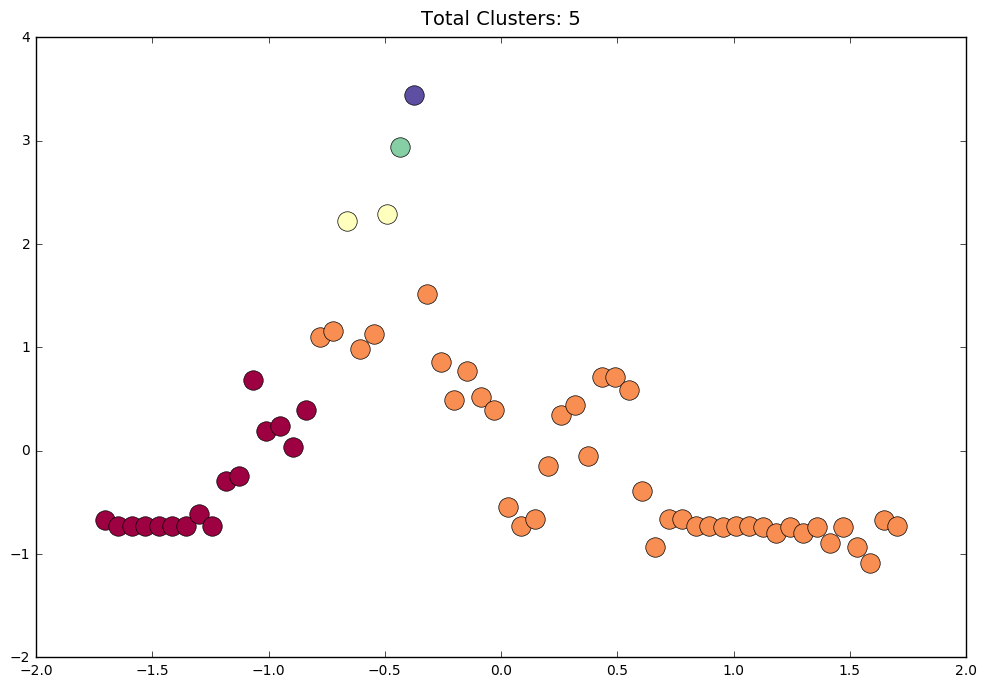

In [61]:
test_clusters(px, 0.5 , 10, 500)

C:\Users\sandhyao\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:


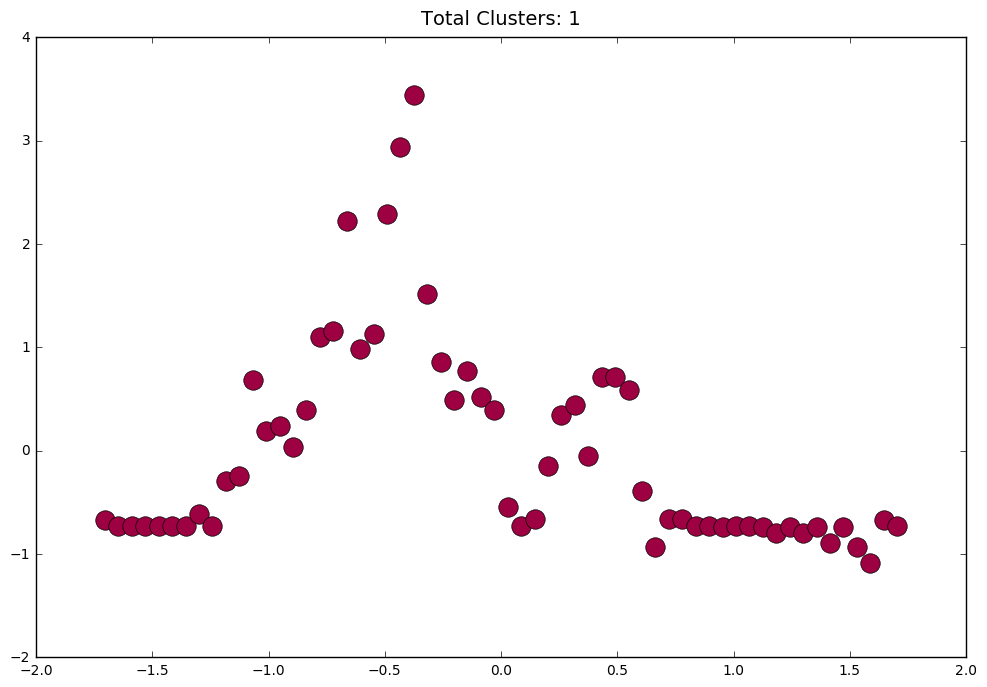

In [62]:
test_clusters(px, 1 , 10, 500)

C:\Users\sandhyao\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:


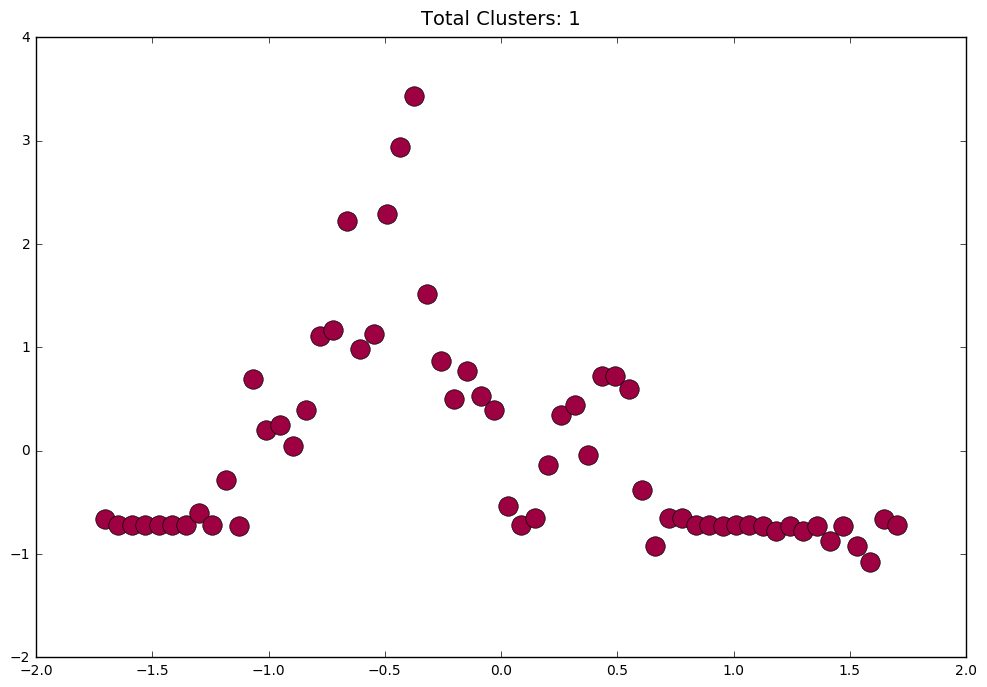

In [63]:
test_clusters(px, 1 , 10, 400)

C:\Users\sandhyao\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:


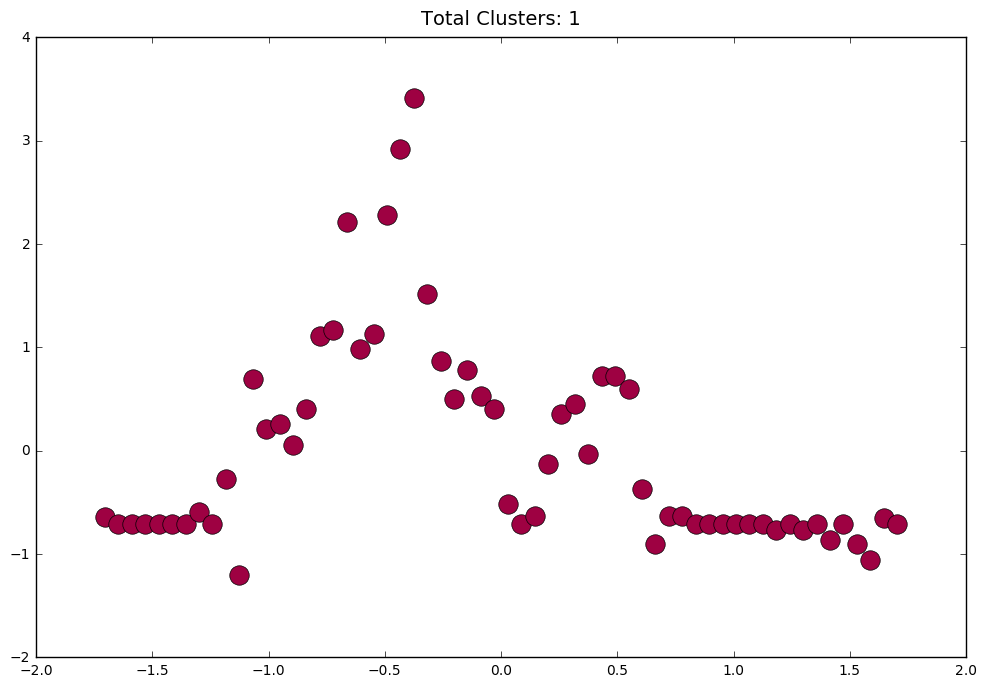

In [64]:
test_clusters(px, 1 , 10, 300)

C:\Users\sandhyao\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:


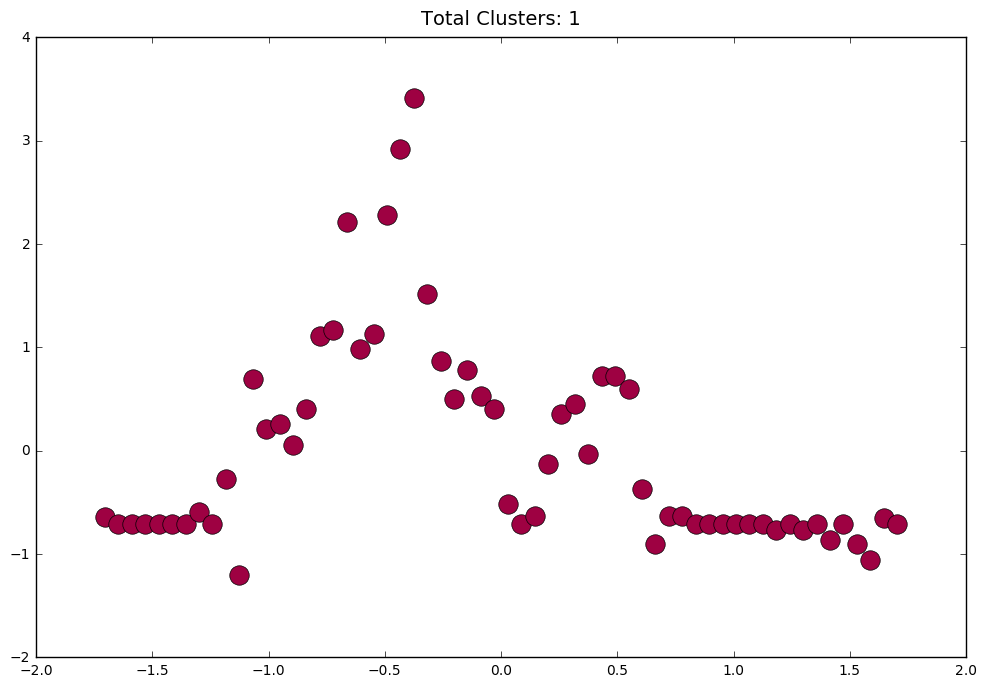

In [65]:
test_clusters(px, 1.5 , 10, 300)

In [66]:
px[45]

401.77221192133499

C:\Users\sandhyao\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:


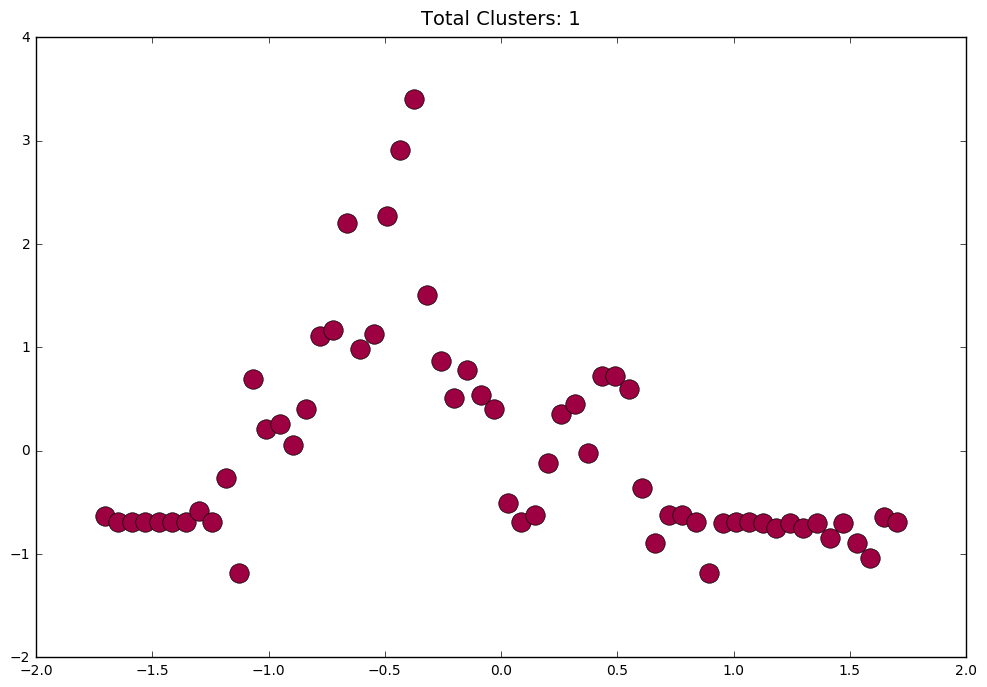

In [67]:
test_clusters(px, 1.5 , 45, 300)

In [68]:
px[55]

399.992157816347

C:\Users\sandhyao\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:


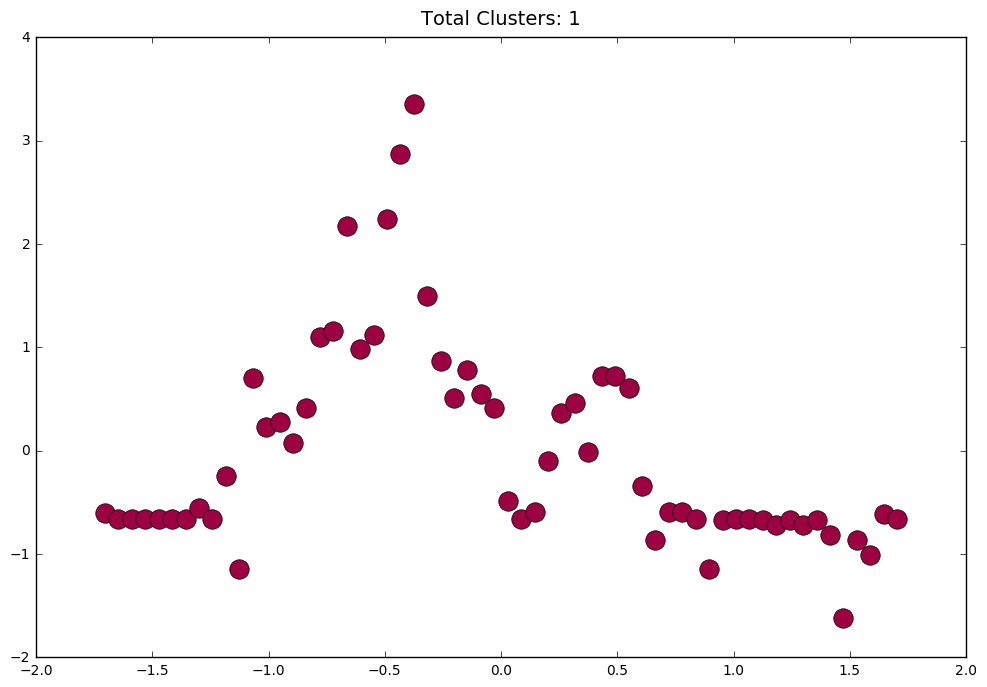

In [69]:
test_clusters(px, 1 , 55 , 200)

In [70]:
pf = pd.concat([ff, pd.DataFrame(db.labels_,columns=['cluster'])], axis=1)
pf


,index,fare,cluster
0,0,414.272592,0
1,1,401.772212,0
2,2,401.772212,0
3,3,401.772212,0
4,4,401.772212,0
5,5,401.772212,0
6,6,401.772212,0
7,7,425.072920,0
8,8,401.772212,0
9,9,489.994893,0


In [71]:
rf = pf.groupby('cluster')['fare'].agg(['min','count'])
rf

,min,count
cluster,,
0,401.772212,16
1,329.000000,40
2,1003.200492,2
3,1150.014955,1
4,1251.798049,1


In [72]:
rf.describe([.10,.25,.5,.75,.9])

,min,count
count,5.000000,5.000000
mean,827.157142,12.000000
std,431.468772,16.896745
min,329.000000,1.000000
10%,358.108885,1.000000
25%,401.772212,1.000000
50%,1003.200492,2.000000
75%,1150.014955,16.000000
90%,1211.084811,30.400000
max,1251.798049,40.000000
